# Trabalho Final - Machine Learning

* integrante 1
* integrante 2
* integrante 3
* integrante 4

Neste trabalho, como parte do time de analistas da Quantum Finance, voc√™s dever√£o explorar uma base de dados originalmente utilizada para classifica√ß√£o de score de cr√©dito, dispon√≠vel no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando t√©cnicas de An√°lise Explorat√≥ria de Dados (EDA) e algoritmos de Machine Learning supervisionados. 


O objetivo √© aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da an√°lise da base de dados.

**Modelo de Classifica√ß√£o Supervisionada**


Desenvolver um modelo de classifica√ß√£o supervisionada para prever a classifica√ß√£o de cr√©dito dos indiv√≠duos presentes na base.


Passos esperados:

1. Realizar uma an√°lise explorat√≥ria dos dados (EDA) para entender as caracter√≠sticas principais da base e as rela√ß√µes entre vari√°veis; 2 pontos

2. Implementar um pipeline de modelo de classifica√ß√£o usando Random Forest, XGBoost e LightGBM. Use GridSearch para otimizar os parametros de cada modelo; 4 pontos

3. Avaliar os resultados utilizando a m√©trica mais adequada e **justifique** sua escolha; 2 pontos

4. Apresentar os resultados, indicando a m√©trica no conjunto de treino (train.csv) e explicar como o modelo pode ser utilizado para decis√µes financeiras. 2 pontos


Entreg√°veis:

1. Este jupyter notebook executado e com os resultados aparentes (n√£o ser√£o aceitos outros formatos)

### 1. Importa√ß√£o de Bibliotecas

Importa as principais bibliotecas para an√°lise de dados, visualiza√ß√£o e machine learning:

pandas, numpy: manipula√ß√£o de dados

seaborn, matplotlib: gr√°ficos

sklearn: modelos, pr√©-processamento e valida√ß√£o

xgboost, lightgbm: algoritmos de ML avan√ßados

In [42]:
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




### 2. Carregamento dos Dados

Carrega o arquivo de dados principal para um DataFrame.

In [43]:
df_original = pd.read_csv("train.csv")  


In [44]:
df_original.describe().round(2)  # propor√ß√£o de valores ausentes por coluna

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count               84998.00          100000.00        100000.00   
mean                 4194.17              17.09            22.47   
std                  3183.69             117.40           129.06   
min                   303.65              -1.00             0.00   
25%                  1625.57               3.00             4.00   
50%                  3093.75               6.00             5.00   
75%                  5957.45               7.00             7.00   
max                 15204.63            1798.00          1499.00   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count      100000.00            100000.00              98035.00   
mean           72.47                21.07                 27.75   
std           466.42                14.86                193.18   
min             1.00                -5.00                  0.00   
25%             8.00                10.00                  3.00   
50%            13.00                18.00                  6.00   
75%            20.00                28.00                  9.00   
max          5797.00                67.00               2597.00   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count                 100000.00            100000.00  
mean                      32.29              1403.12  
std                        5.12              8306.04  
min                       20.00                 0.00  
25%                       28.05                30.31  
50%                       32.31                69.25  
75%                       36.50               161.22  
max                       50.00             82331.00

In [45]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob


<i><p style='color:#006DB2' ><big><strong>3.</strong></big> Tratamento de Dados </p>
<p style='color:#006DB2' >Converte colunas para tipos num√©ricos e trata valores inconsistentes:</p>
<p style='color:#006DB2' >
Usa pd.to_numeric(..., errors='coerce') para garantir que os dados estejam no formato correto.
Mapeia vari√°veis categ√≥ricas para valores num√©ricos (ex: Credit_Score, Credit_Mix, Payment_of_Min_Amount). </p></i>

In [46]:
df_dados_numericos_tratados = df_original.copy()

df_dados_numericos_tratados['Outstanding_Debt'] = pd.to_numeric(df_original['Outstanding_Debt'], errors='coerce').astype(float)
df_dados_numericos_tratados['Changed_Credit_Limit'] = pd.to_numeric(df_original['Changed_Credit_Limit'], errors='coerce').astype(float)
df_dados_numericos_tratados['Num_of_Loan'] = pd.to_numeric(df_original['Num_of_Loan'], errors='coerce').astype(float)
df_dados_numericos_tratados['Annual_Income'] = pd.to_numeric(df_original['Annual_Income'], errors='coerce').astype(float)
df_dados_numericos_tratados['Monthly_Balance'] = pd.to_numeric(df_original['Monthly_Balance'], errors='coerce').astype(float)
df_dados_numericos_tratados['Amount_invested_monthly'] = pd.to_numeric(df_original['Amount_invested_monthly'], errors='coerce').astype(float)
df_dados_numericos_tratados['Monthly_Inhand_Salary'] = pd.to_numeric(df_original['Monthly_Inhand_Salary'], errors='coerce').astype(float)
df_dados_numericos_tratados['Num_of_Delayed_Payment'] = pd.to_numeric(df_original['Num_of_Delayed_Payment'], errors='coerce').astype(float)

score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_dados_numericos_tratados['Credit_Score'] = df_original['Credit_Score'].map(score_map).astype('Int64')

score_map2 = {'Bad': 0, 'Standard': 1, 'Good': 2, '_': None}
df_dados_numericos_tratados['Credit_Mix'] = df_original['Credit_Mix'].map(score_map2).astype('Int64')

score_map3 = {'NM': 0, 'No': 1, 'Yes': 2}
df_dados_numericos_tratados['Payment_of_Min_Amount'] = df_original['Payment_of_Min_Amount'].map(score_map3).astype('Int64')

<i><p style='color:#006DB2' ><big><strong>4.</strong></big> Limpeza de Colunas Espec√≠ficas </p>
<p style='color:#006DB2' >Remove caracteres indesejados e converte para num√©rico:</p>
<p style='color:#006DB2' >Age e Credit_History_Age passam por limpeza de strings e convers√£o para n√∫meros. </p></i>

In [47]:
df_dados_numericos_tratados['Age'] = (
    df_dados_numericos_tratados['Age']
    .astype(str)
    .str.replace('-', '', regex=False)
    .str.replace(' ', '', regex=False)  
    .str.replace('_', '', regex=False) 
    .str.replace('nan', '', regex=False)  
    .str.strip()
)

df_dados_numericos_tratados['Age'] = pd.to_numeric(df_dados_numericos_tratados['Age'], errors='coerce').astype(int)

df_dados_numericos_tratados['Credit_History_Age'] = (
    df_dados_numericos_tratados['Credit_History_Age']
    .astype(str)
    .str.replace(' Years and ', '.', regex=False)
    .str.replace(' Months', '', regex=False) 
    .str.replace(' ', '', regex=False) 
    .str.replace('nan', '', regex=False) 
    .str.strip()
)

df_dados_numericos_tratados['Credit_History_Age'] = pd.to_numeric(df_dados_numericos_tratados['Credit_History_Age'], errors='coerce').astype(float)


Estat√≠sticas da coluna Age:
count    100000.000000
mean        119.509700
std         684.757313
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

Distribui√ß√£o dos valores de Age:
Age
8698       1
8697       1
8682       1
8678       1
8674       1
        ... 
18      2385
17      1502
16      1455
15      1574
14      1175
Name: count, Length: 1728, dtype: int64


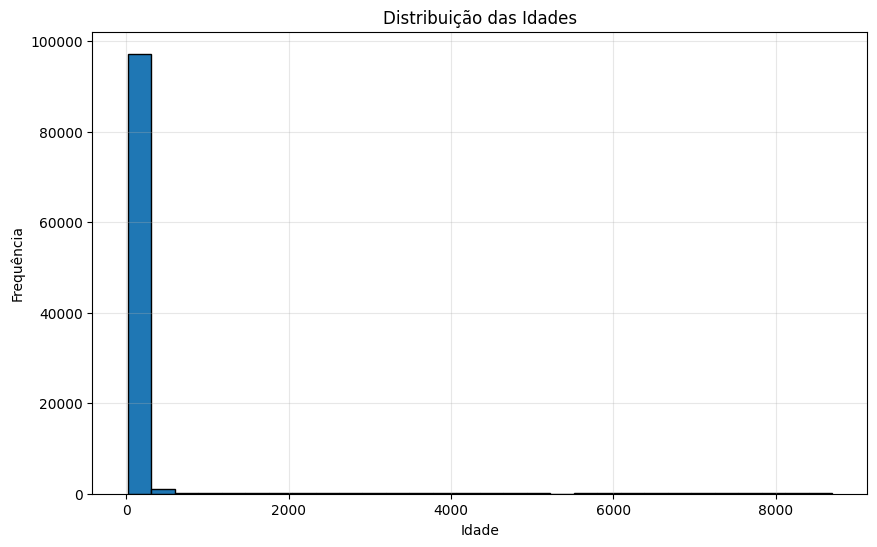


Distribui√ß√£o por faixa et√°ria:
Faixa_Etaria
0-20     13628
21-30    27964
31-40    28144
41-50    20443
51-60     7040
61-70        0
71-80        0
81-90        0
90+       2781
Name: count, dtype: int64

Estat√≠sticas para idade at√© 60 anos:
M√©dia de idade: 33.32
Mediana de idade: 33.00


In [ ]:
# An√°lise da coluna Age
print("\nEstat√≠sticas da coluna Age:")
print(df_dados_numericos_tratados['Age'].describe())

# Verificar valores √∫nicos e suas contagens
print("\nDistribui√ß√£o dos valores de Age:")
print(df_dados_numericos_tratados['Age'].value_counts().sort_index(ascending=False))

# Plotar histograma da distribui√ß√£o de idades
plt.figure(figsize=(10,6))
plt.hist(df_dados_numericos_tratados['Age'], bins=30, edgecolor='black')
plt.title('Distribui√ß√£o das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')
plt.grid(True, alpha=0.3)
plt.show()

# An√°lise por faixa et√°ria
faixas_etarias = [0, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '90+']
df_dados_numericos_tratados['Faixa_Etaria'] = pd.cut(df_dados_numericos_tratados['Age'], bins=faixas_etarias, labels=labels, right=True)

print("\nDistribui√ß√£o por faixa et√°ria:")
print(df_dados_numericos_tratados['Faixa_Etaria'].value_counts().sort_index())



In [55]:
# Filtrando dados para idade at√© 60 anos
dados_ate_60 = df_dados_numericos_tratados[df_dados_numericos_tratados['Age'] <= 60]

print("\nEstat√≠sticas para idade at√© 60 anos:")
print(f"M√©dia de idade: {dados_ate_60['Age'].mean():.2f}")
print(f"Mediana de idade: {dados_ate_60['Age'].median():.2f}")

# Criando novo dataframe com base no df_dados_numericos_tratados
df_age_tratados = df_dados_numericos_tratados.copy()

# Obtendo a mediana calculada anteriormente para idades at√© 60 anos
mediana_ate_60 = dados_ate_60['Age'].median()

# Substituindo valores de Age maiores que 60 pela mediana
df_age_tratados.loc[df_age_tratados['Age'] > 60, 'Age'] = mediana_ate_60

print("\nEstat√≠sticas da coluna Age ap√≥s tratamento:")
print(df_age_tratados['Age'].describe())



Estat√≠sticas para idade at√© 60 anos:
M√©dia de idade: 33.32
Mediana de idade: 33.00

Estat√≠sticas da coluna Age ap√≥s tratamento:
count    100000.00000
mean         33.31111
std          10.61888
min          14.00000
25%          25.00000
50%          33.00000
75%          41.00000
max          56.00000
Name: Age, dtype: float64


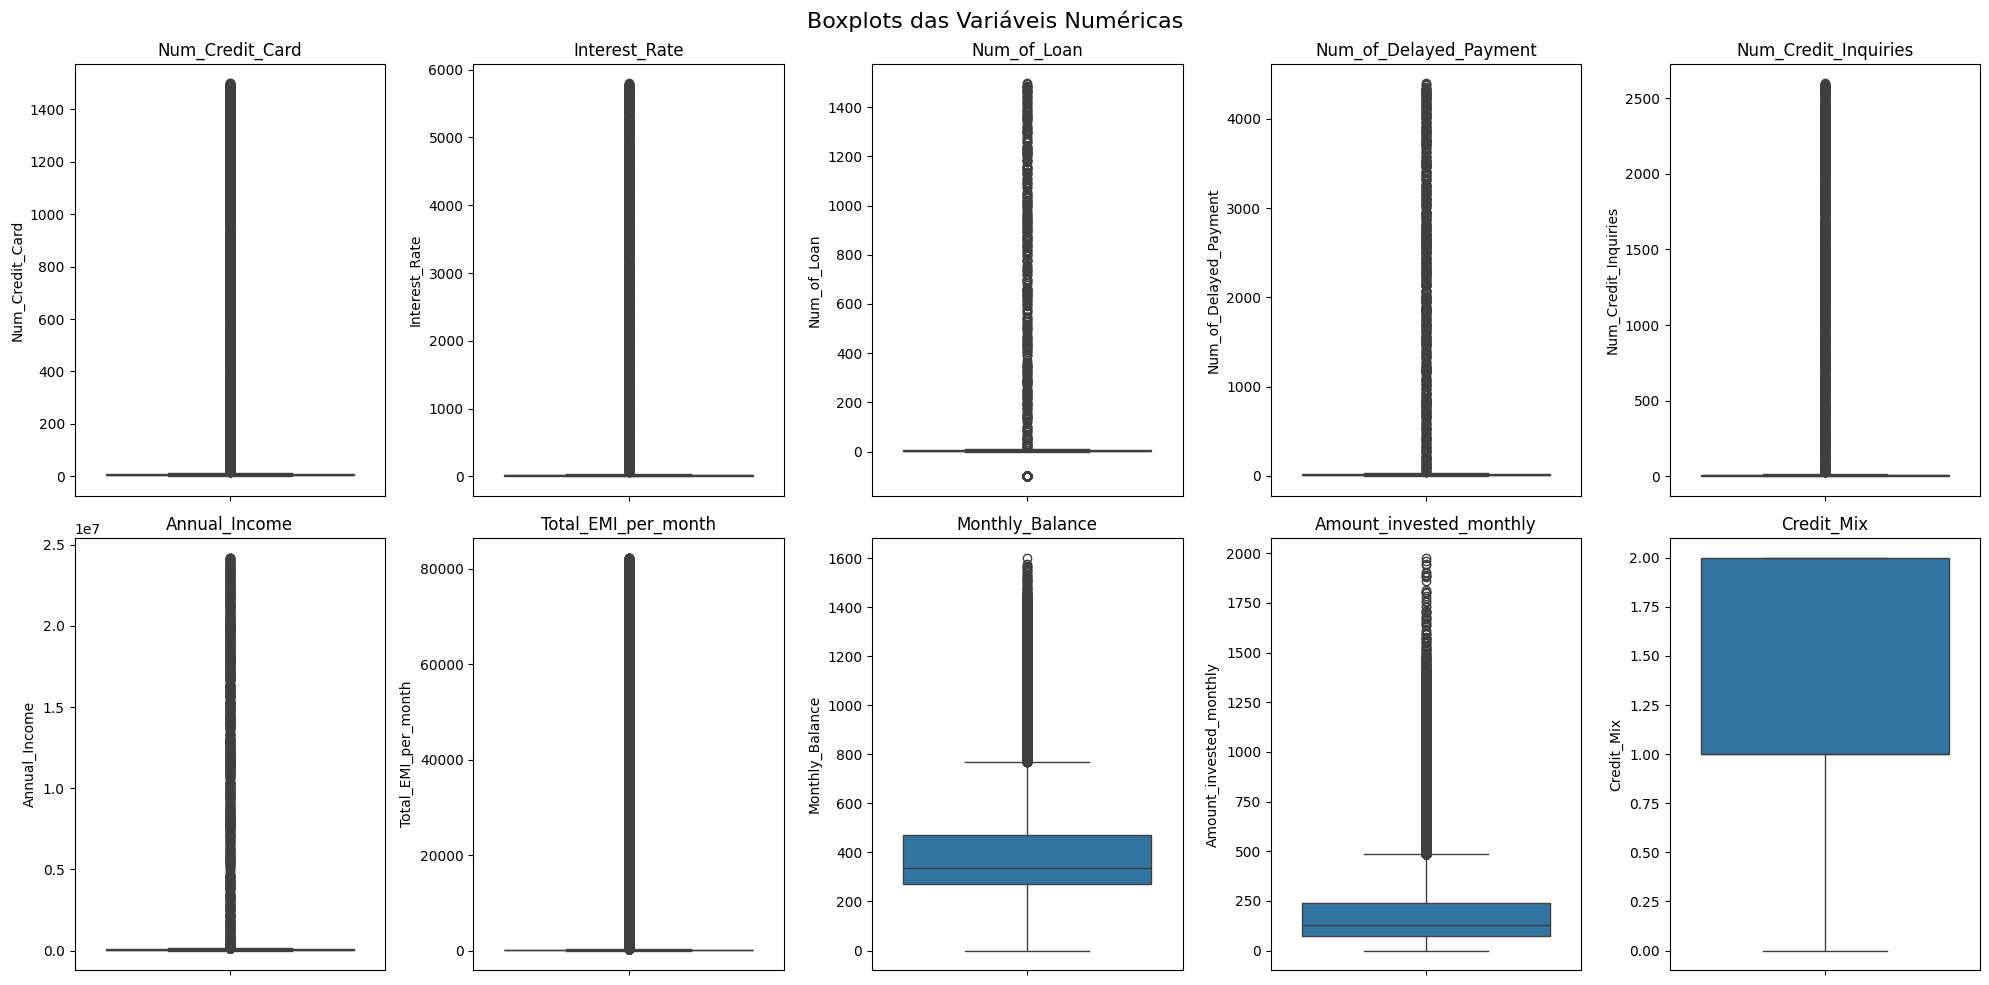

In [56]:
# Criando subplots para os boxplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Boxplots das Vari√°veis Num√©ricas', fontsize=16)

# Lista de colunas para plotar
colunas = ['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
           'Num_Credit_Inquiries', 'Annual_Income', 'Total_EMI_per_month', 'Monthly_Balance',
           'Amount_invested_monthly', 'Credit_Mix']

# Plotando cada boxplot
for i, coluna in enumerate(colunas):
    row = i // 5
    col = i % 5
    sns.boxplot(data=df_age_tratados, y=coluna, ax=axes[row, col])
    axes[row, col].set_title(coluna)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [59]:
# An√°lise da coluna Num_Credit_Card
print("Estat√≠sticas descritivas da coluna Num_Credit_Card:")
print(df_age_tratados['Num_Credit_Card'].describe())

# Calculando os limites para outliers usando o m√©todo IQR
Q1 = df_age_tratados['Num_Credit_Card'].quantile(0.25)
Q3 = df_age_tratados['Num_Credit_Card'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("\nLimites para outliers:")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_age_tratados[(df_age_tratados['Num_Credit_Card'] < limite_inferior) | 
                          (df_age_tratados['Num_Credit_Card'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_age_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nM√©dia de cart√µes de cr√©dito por score:")
print(df_age_tratados.groupby('Credit_Score')['Num_Credit_Card'].mean())


# Com base na an√°lise anterior, podemos ver que h√° uma correla√ß√£o negativa (-0.399)
# entre Num_Credit_Card e Credit_Score, sugerindo que um n√∫mero muito alto de cart√µes
# pode impactar negativamente o score de cr√©dito. 


# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_age_tratados[(df_age_tratados['Num_Credit_Card'] >= limite_inferior) & 
                         (df_age_tratados['Num_Credit_Card'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(f"M√©dia de cart√µes de cr√©dito: {df_temp['Num_Credit_Card'].mean():.2f}")
print(f"Mediana de cart√µes de cr√©dito: {df_temp['Num_Credit_Card'].median():.2f}")

# Criando novo dataframe com os valores ajustados
df_num_credit_card_tratados = df_age_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_cartoes = df_temp['Num_Credit_Card'].median()

# Ajustando valores fora dos limites para a mediana
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Credit_Card'] < limite_inferior, 'Num_Credit_Card'] = mediana_cartoes
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Credit_Card'] > limite_superior, 'Num_Credit_Card'] = mediana_cartoes

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_num_credit_card_tratados['Num_Credit_Card'].describe())



Estat√≠sticas descritivas da coluna Num_Credit_Card:
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Limites para outliers:
Limite inferior: -0.50
Limite superior: 11.50

Quantidade de outliers: 2271
Percentual de outliers: 2.27%

M√©dia de cart√µes de cr√©dito por score:
Credit_Score
0    23.981447
1    22.079926
2    21.199854
Name: Num_Credit_Card, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
M√©dia de cart√µes de cr√©dito: 5.53
Mediana de cart√µes de cr√©dito: 5.00

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    100000.000000
mean          5.521210
std           2.045632
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64


In [ ]:
# Substituindo valores negativos de Num_Bank_Accounts por 0
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

print("\nEstat√≠sticas ap√≥s substituir valores negativos:")
print(df_num_credit_card_tratados['Num_Bank_Accounts'].describe())

# An√°lise de outliers para Num_Bank_Accounts
Q1 = df_num_credit_card_tratados['Num_Bank_Accounts'].quantile(0.25)
Q3 = df_num_credit_card_tratados['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("\nLimites para outliers:")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_num_credit_card_tratados[(df_num_credit_card_tratados['Num_Bank_Accounts'] < limite_inferior) | 
                                     (df_num_credit_card_tratados['Num_Bank_Accounts'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_num_credit_card_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nM√©dia de contas banc√°rias por score:")
print(df_num_credit_card_tratados.groupby('Credit_Score')['Num_Bank_Accounts'].mean())

# Com base na an√°lise anterior, podemos ver que h√° uma correla√ß√£o negativa (-0.390)
# entre Num_Bank_Accounts e Credit_Score, sugerindo que um n√∫mero muito alto de contas
# pode impactar negativamente o score de cr√©dito.

# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_num_credit_card_tratados[(df_num_credit_card_tratados['Num_Bank_Accounts'] >= limite_inferior) & 
                                    (df_num_credit_card_tratados['Num_Bank_Accounts'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(f"M√©dia de contas banc√°rias: {df_temp['Num_Bank_Accounts'].mean():.2f}")
print(f"Mediana de contas banc√°rias: {df_temp['Num_Bank_Accounts'].median():.2f}")

# Criando novo dataframe com os valores ajustados
df_num_bank_accounts_tratados = df_num_credit_card_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_contas = df_temp['Num_Bank_Accounts'].median()

# Ajustando valores fora dos limites para a mediana
df_num_bank_accounts_tratados.loc[df_num_bank_accounts_tratados['Num_Bank_Accounts'] < limite_inferior, 'Num_Bank_Accounts'] = mediana_contas
df_num_bank_accounts_tratados.loc[df_num_bank_accounts_tratados['Num_Bank_Accounts'] > limite_superior, 'Num_Bank_Accounts'] = mediana_contas

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_num_bank_accounts_tratados['Num_Bank_Accounts'].describe())



Estat√≠sticas ap√≥s substituir valores negativos:
count    100000.000000
mean         17.091490
std         117.404803
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Limites para outliers:
Limite inferior: -3.00
Limite superior: 13.00

Quantidade de outliers: 1315
Percentual de outliers: 1.31%

M√©dia de contas banc√°rias por score:
Credit_Score
0    18.724705
1    16.873867
2    15.084081
Name: Num_Bank_Accounts, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
M√©dia de contas banc√°rias: 5.37
Mediana de contas banc√°rias: 5.00

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    100000.00000
mean          5.36300
std           2.57659
min           0.00000
25%           3.00000
50%           5.00000
75%           7.00000
max          11.00000
Name: Num_Bank_Accounts, dtype: float64


<i><p style='color:#006DB2' ><big><strong>5.</strong></big> Fun√ß√£o para Remo√ß√£o de Outliers </p>
<p style='color:#006DB2' >Remove outliers de colunas num√©ricas usando o m√©todo do IQR.</p></i>

In [7]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

<i><p style='color:#006DB2' ><big><strong>6.</strong></big>Aplica√ß√£o da Remo√ß√£o de Outliers</p>
<p style='color:#006DB2' >Aplica a fun√ß√£o para v√°rias colunas relevantes do DataFrame.</p></i>

In [ ]:
# df = remove_outliers_iqr(df, 'Interest_Rate')
# df = remove_outliers_iqr(df, 'Num_of_Loan')
# df = remove_outliers_iqr(df, 'Num_of_Delayed_Payment')
# df = remove_outliers_iqr(df, 'Num_Credit_Inquiries')
# df = remove_outliers_iqr(df, 'Annual_Income')
# df = remove_outliers_iqr(df, 'Total_EMI_per_month')
# df = remove_outliers_iqr(df, 'Monthly_Balance')
# df = remove_outliers_iqr(df, 'Amount_invested_monthly')
# df = remove_outliers_iqr(df, 'Credit_Mix')


<i><p style='color:#006DB2' ><big><strong>7.</strong></big> Tratamento de Valores Nulos </p>
<p style='color:#006DB2' >Preenche valores nulos com a m√©dia das colunas:</p></i>

In [11]:
media_age = df['Credit_History_Age'].mean()
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(media_age)

media_mon = df['Monthly_Inhand_Salary'].mean()
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(media_mon)

<i><p style='color:#006DB2' ><big><strong>8.</strong></big> Prepara√ß√£o dos Dados para Modelagem</p>
<p style='color:#006DB2' >Define as vari√°veis num√©ricas (var_num)</p></i>

In [12]:
var_num = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age',
    'Credit_Mix'
]




<i><p style='color:#006DB2' ><big><strong>9.</strong></big> An√°lise Explorat√≥ria </p>
<p style='color:#006DB2' ><li style='color:#006DB2' >Exibe estat√≠sticas descritivas das vari√°veis num√©ricas.</li>
<li style='color:#006DB2' >Gera histogramas para visualizar distribui√ß√µes.</li>
<li style='color:#006DB2' >Calcula e exibe matriz de correla√ß√£o e heatmap.</li></p></i>

In [13]:
print("=" * 80)
print("ESTAT√çSTICAS DESCRITIVAS DAS VARI√ÅVEIS NUM√âRICAS")
print("=" * 80)
df[var_num].describe().round(2)

ESTAT√çSTICAS DESCRITIVAS DAS VARI√ÅVEIS NUM√âRICAS


Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  36938.00       36938.00               36938.00           36938.00   
mean      32.87       35995.29                2999.59               5.64   
std       10.72       23583.32                1818.22               2.54   
min       14.00        7005.93                 303.65              -1.00   
25%       24.00       17518.21                1575.05               4.00   
50%       33.00       30738.51                2918.76               6.00   
75%       41.00       48615.22                3587.85               8.00   
max       56.00      142635.52               11708.29              11.00   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
count         36938.00       36938.00     36938.00             36938.00   
mean              5.70          15.46         3.78                22.37   
std               2.07           8.86         2.43                15.22   
min               0.00           1.00         0.00                -5.00   
25%               4.00           8.00         2.00                11.00   
50%               6.00          15.00         4.00                19.00   
75%               7.00          21.00         6.00                29.00   
max              11.00          34.00         9.00                67.00   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count                36938.00              36169.00              36938.00   
mean                    13.97                 10.82                  6.19   
std                      6.15                  6.91                  3.90   
min                     -3.00                 -6.44                  0.00   
25%                     10.00                  5.69                  3.00   
50%                     15.00                  9.72                  6.00   
75%                     19.00                 15.57                  9.00   
max                     28.00                 36.49                 17.00   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count          36577.00                  36938.00             36938.00   
mean            1534.62                     31.98                81.87   
std             1191.88                      4.99                75.46   
min                0.23                     21.26                 0.00   
25%              629.26                     27.80                27.76   
50%             1271.65                     32.00                57.58   
75%             2173.47                     36.20               113.16   
max             4998.07                     43.57               347.57   

       Amount_invested_monthly  Monthly_Balance  Credit_History_Age  \
count                 36938.00         36938.00            36938.00   
mean                    133.84           354.91               17.57   
std                      93.75           127.25                7.94   
min                       0.00             0.10                0.10   
25%                      62.83           268.82               11.70   
50%                     108.08           323.48               17.57   
75%                     180.38           417.52               23.20   
max                     431.28           740.50               33.80   

       Credit_Mix  
count     36938.0  
mean         0.98  
std          0.72  
min           0.0  
25%           0.0  
50%           1.0  
75%           2.0  
max           2.0

AN√ÅLISE DE VALORES AUSENTES

Colunas com valores ausentes:


Coluna  Qtd_Missing  Perc_Missing
Name                                  Name         3727         10.09
Type_of_Loan                  Type_of_Loan         3319          8.99
Changed_Credit_Limit  Changed_Credit_Limit          769          2.08
Outstanding_Debt          Outstanding_Debt          361          0.98


DISTRIBUI√á√ÉO DO CREDIT SCORE (TARGET)


Classe  Quantidade  Percentual
0      Poor       11841       32.06
1  Standard       19659       53.22
2      Good        5438       14.72

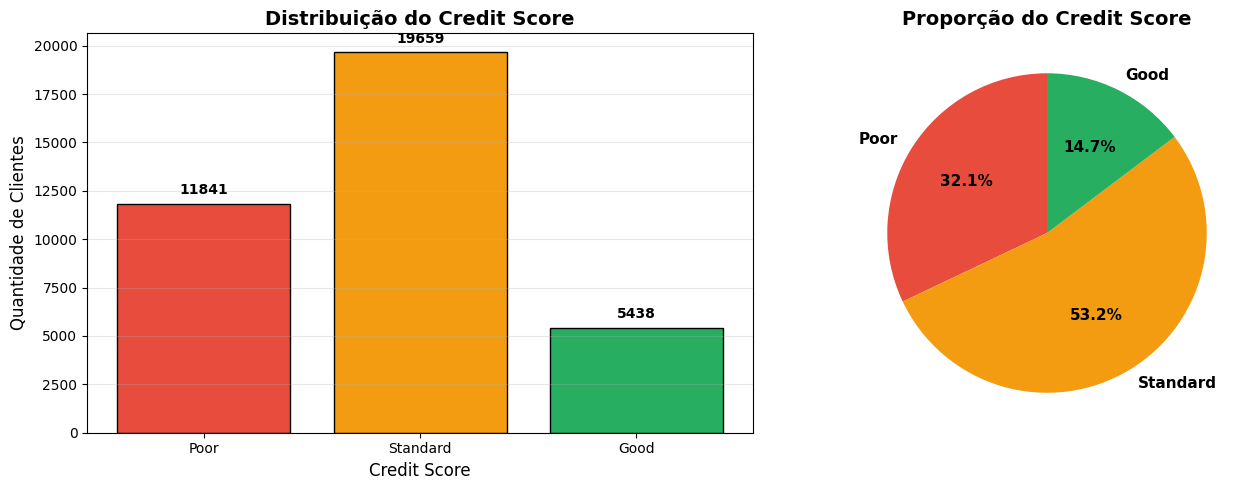

In [14]:
# An√°lise detalhada de valores ausentes
print("=" * 80)
print("AN√ÅLISE DE VALORES AUSENTES")
print("=" * 80)

missing_data = pd.DataFrame({
    'Coluna': df.columns,
    'Qtd_Missing': df.isnull().sum(),
    'Perc_Missing': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Qtd_Missing', ascending=False)

print("\nColunas com valores ausentes:")
display(missing_data[missing_data['Qtd_Missing'] > 0])

# Distribui√ß√£o da vari√°vel target
print("\n" + "=" * 80)
print("DISTRIBUI√á√ÉO DO CREDIT SCORE (TARGET)")
print("=" * 80)

credit_score_dist = df['Credit_Score'].value_counts().sort_index()
credit_score_perc = (df['Credit_Score'].value_counts(normalize=True) * 100).round(2).sort_index()

score_summary = pd.DataFrame({
    'Classe': ['Poor', 'Standard', 'Good'],
    'Quantidade': credit_score_dist.values,
    'Percentual': credit_score_perc.values
})

display(score_summary)

# Visualiza√ß√£o da distribui√ß√£o do target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fico de barras
axes[0].bar(score_summary['Classe'], score_summary['Quantidade'], color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[0].set_title('Distribui√ß√£o do Credit Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit Score', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(score_summary['Quantidade']):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Gr√°fico de pizza
colors_pie = ['#e74c3c', '#f39c12', '#27ae60']
axes[1].pie(score_summary['Quantidade'], labels=score_summary['Classe'], autopct='%1.1f%%', 
            colors=colors_pie, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Propor√ß√£o do Credit Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


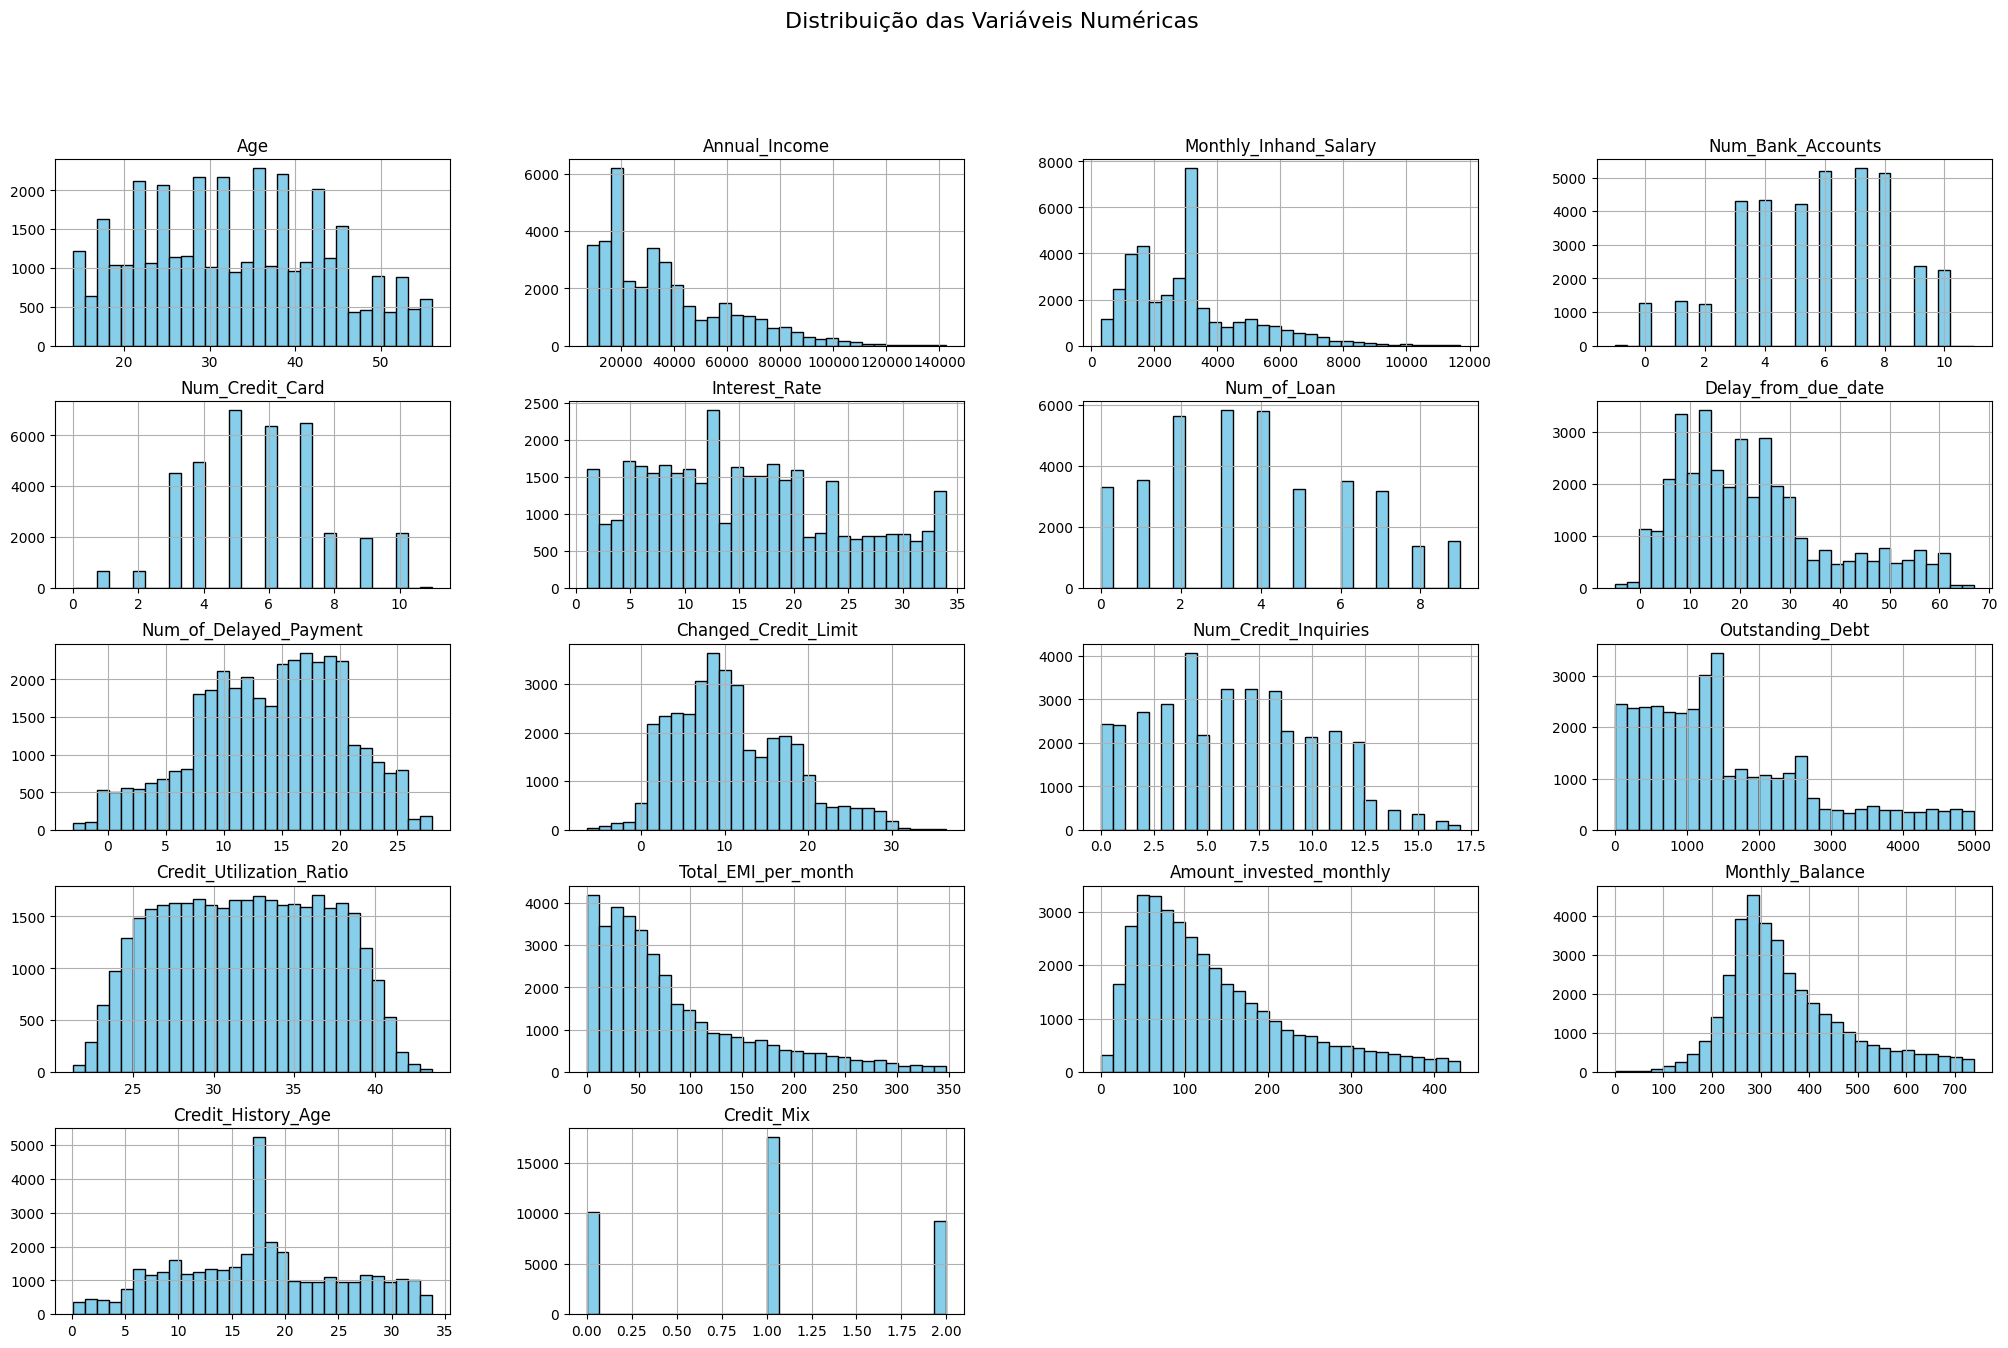

In [15]:
df[var_num].hist(bins=30, figsize=(25,15), color='skyblue', edgecolor='black')
plt.suptitle('Distribui√ß√£o das Vari√°veis Num√©ricas', fontsize=16)
plt.show()

### üìä An√°lise Bivariada: Vari√°veis Num√©ricas vs Credit Score

An√°lise da rela√ß√£o entre as principais vari√°veis financeiras e o score de cr√©dito.


In [16]:
# An√°lise das principais vari√°veis financeiras por Credit Score
print("=" * 80)
print("AN√ÅLISE BIVARIADA: VARI√ÅVEIS FINANCEIRAS vs CREDIT SCORE")
print("=" * 80)

# Vari√°veis chave para an√°lise
key_vars = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 
            'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment', 'Total_EMI_per_month']

# Mapeamento do Credit Score para r√≥tulos leg√≠veis
score_labels = {0: 'Poor', 1: 'Standard', 2: 'Good'}
df['Credit_Score_Label'] = df['Credit_Score'].map(score_labels)

# Estat√≠sticas agregadas por Credit Score
for var in key_vars:
    print(f"\n{var} por Credit Score:")
    agg_stats = df.groupby('Credit_Score_Label')[var].agg(['mean', 'median', 'std']).round(2)
    display(agg_stats)
    print("-" * 80)


AN√ÅLISE BIVARIADA: VARI√ÅVEIS FINANCEIRAS vs CREDIT SCORE

Annual_Income por Credit Score:


mean    median       std
Credit_Score_Label                              
Good                40063.25  34132.87  23936.02
Poor                32404.74  22332.37  21594.51
Standard            37032.68  30815.44  24337.03

--------------------------------------------------------------------------------

Monthly_Inhand_Salary por Credit Score:


mean   median      std
Credit_Score_Label                           
Good                3294.33  2999.59  1864.57
Poor                2752.06  2769.52  1670.03
Standard            3067.15  2905.15  1872.14

--------------------------------------------------------------------------------

Outstanding_Debt por Credit Score:


mean   median      std
Credit_Score_Label                           
Good                 813.63   737.37   649.28
Poor                2161.32  2032.49  1116.84
Standard            1356.18  1054.86  1178.48

--------------------------------------------------------------------------------

Credit_Utilization_Ratio por Credit Score:


mean  median   std
Credit_Score_Label                     
Good                32.21   32.25  5.01
Poor                31.81   31.86  5.00
Standard            32.03   32.01  4.97

--------------------------------------------------------------------------------

Num_of_Delayed_Payment por Credit Score:


mean  median   std
Credit_Score_Label                     
Good                 8.92     9.0  5.69
Poor                16.31    17.0  5.84
Standard            13.96    14.0  5.58

--------------------------------------------------------------------------------

Total_EMI_per_month por Credit Score:


mean  median    std
Credit_Score_Label                      
Good                65.48   44.38  69.20
Poor                94.90   68.08  77.88
Standard            78.56   55.00  74.40

--------------------------------------------------------------------------------


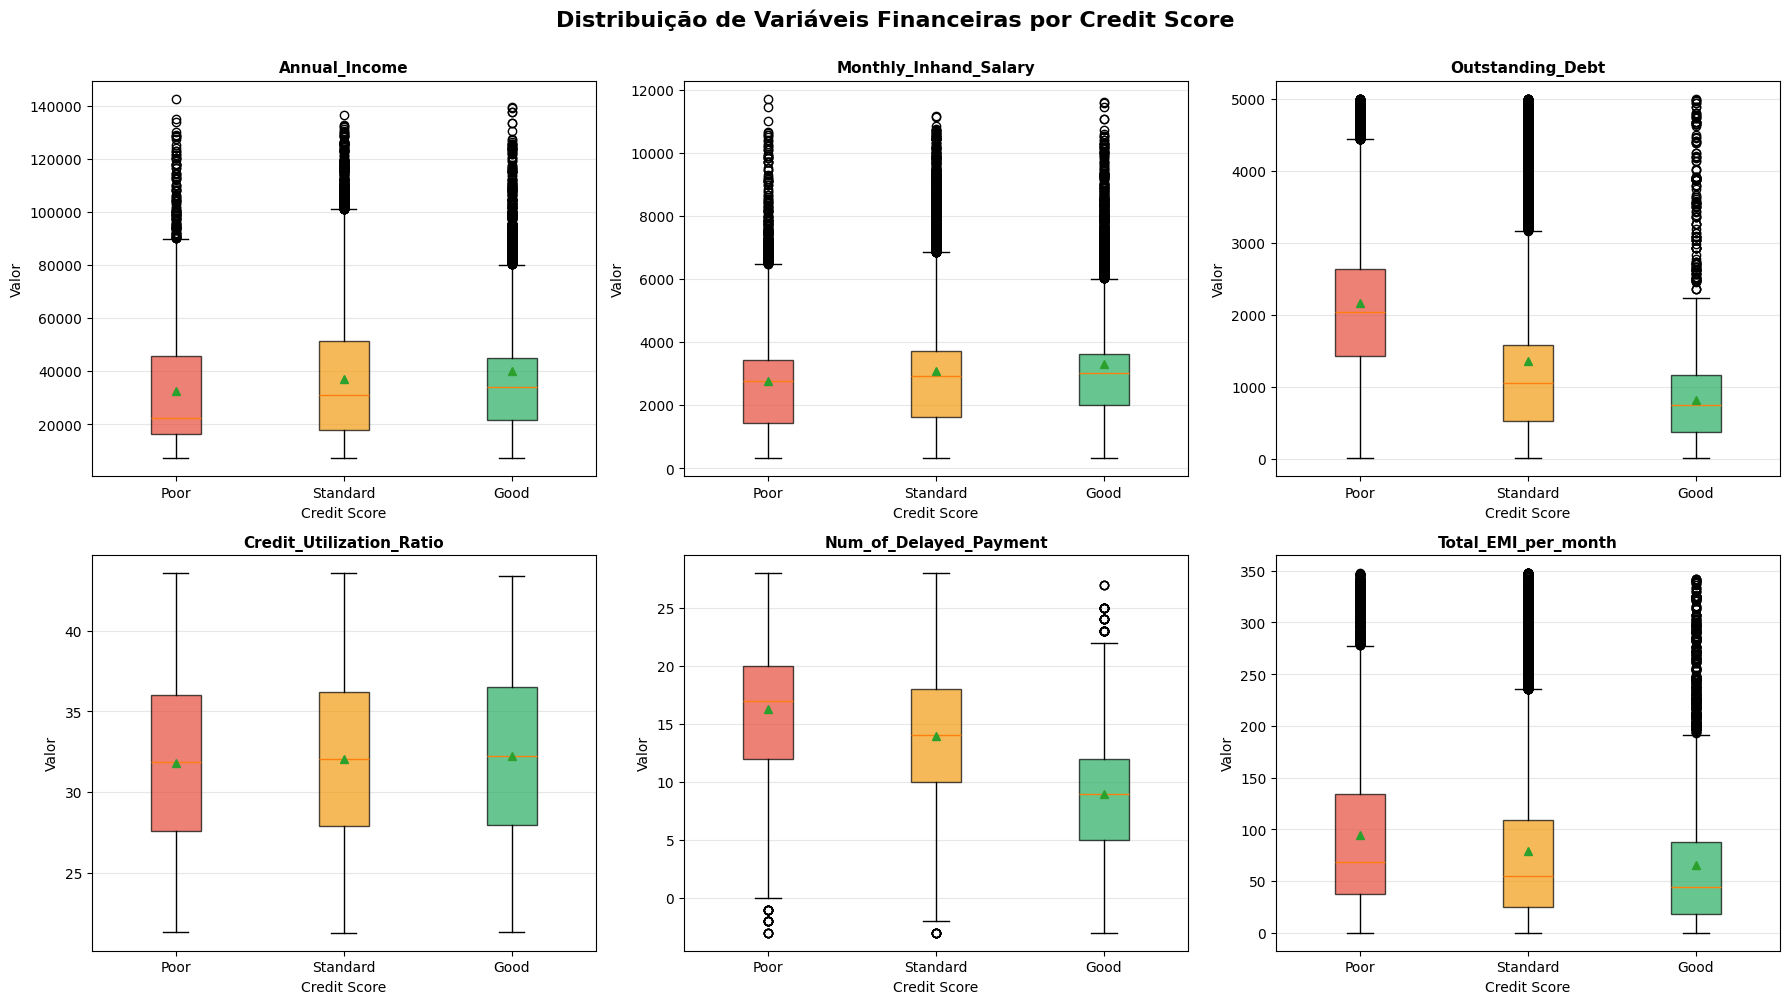

In [17]:
# Box plots das principais vari√°veis por Credit Score
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribui√ß√£o de Vari√°veis Financeiras por Credit Score', 
             fontsize=16, fontweight='bold', y=1.00)

colors = ['#e74c3c', '#f39c12', '#27ae60']
axes_flat = axes.flatten()

for idx, var in enumerate(key_vars):
    ax = axes_flat[idx]
    
    # Criar box plot
    bp = ax.boxplot([df[df['Credit_Score_Label'] == 'Poor'][var].dropna(),
                      df[df['Credit_Score_Label'] == 'Standard'][var].dropna(),
                      df[df['Credit_Score_Label'] == 'Good'][var].dropna()],
                     labels=['Poor', 'Standard', 'Good'],
                     patch_artist=True,
                     showmeans=True)
    
    # Colorir boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_title(var, fontsize=11, fontweight='bold')
    ax.set_xlabel('Credit Score', fontsize=10)
    ax.set_ylabel('Valor', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


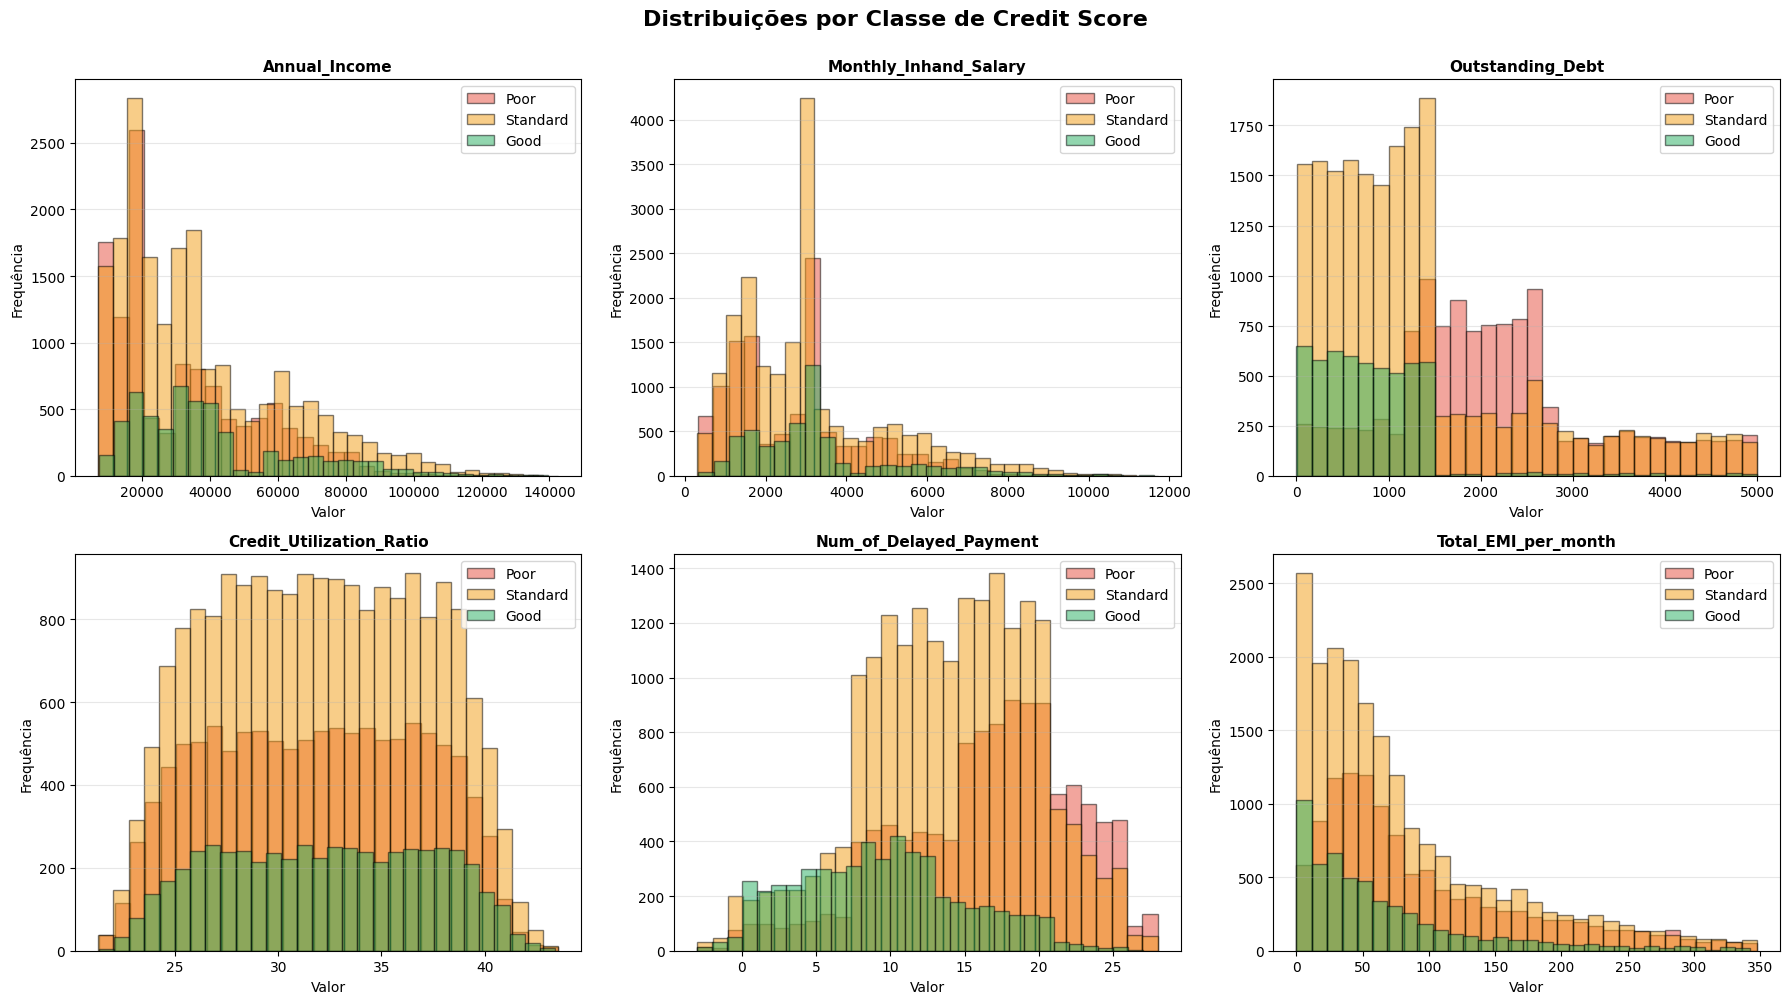

In [18]:
# Distribui√ß√µes sobrepostas por Credit Score
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribui√ß√µes por Classe de Credit Score', 
             fontsize=16, fontweight='bold', y=1.00)

axes_flat = axes.flatten()
colors_hist = {'Poor': '#e74c3c', 'Standard': '#f39c12', 'Good': '#27ae60'}

for idx, var in enumerate(key_vars):
    ax = axes_flat[idx]
    
    for score in ['Poor', 'Standard', 'Good']:
        data = df[df['Credit_Score_Label'] == score][var].dropna()
        ax.hist(data, bins=30, alpha=0.5, label=score, color=colors_hist[score], edgecolor='black')
    
    ax.set_title(var, fontsize=11, fontweight='bold')
    ax.set_xlabel('Valor', fontsize=10)
    ax.set_ylabel('Frequ√™ncia', fontsize=10)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### üîç An√°lise de Correla√ß√µes e Padr√µes Financeiros

Identifica√ß√£o das vari√°veis mais correlacionadas com o Credit Score e padr√µes de comportamento.


CORRELA√á√ÉO DAS VARI√ÅVEIS COM CREDIT SCORE

Top 10 vari√°veis mais correlacionadas (positivamente):


Credit_Score                1.000
Credit_Mix                  0.506
Credit_History_Age          0.379
Monthly_Balance             0.199
Age                         0.163
Annual_Income               0.112
Monthly_Inhand_Salary       0.102
Amount_invested_monthly     0.062
Credit_Utilization_Ratio    0.027
Total_EMI_per_month        -0.132
Changed_Credit_Limit       -0.155
Name: Credit_Score, dtype: float64


Top 10 vari√°veis mais correlacionadas (negativamente):


Total_EMI_per_month      -0.132
Changed_Credit_Limit     -0.155
Num_of_Loan              -0.354
Num_of_Delayed_Payment   -0.367
Outstanding_Debt         -0.389
Num_Bank_Accounts        -0.390
Num_Credit_Card          -0.399
Delay_from_due_date      -0.424
Num_Credit_Inquiries     -0.454
Interest_Rate            -0.496
Name: Credit_Score, dtype: float64

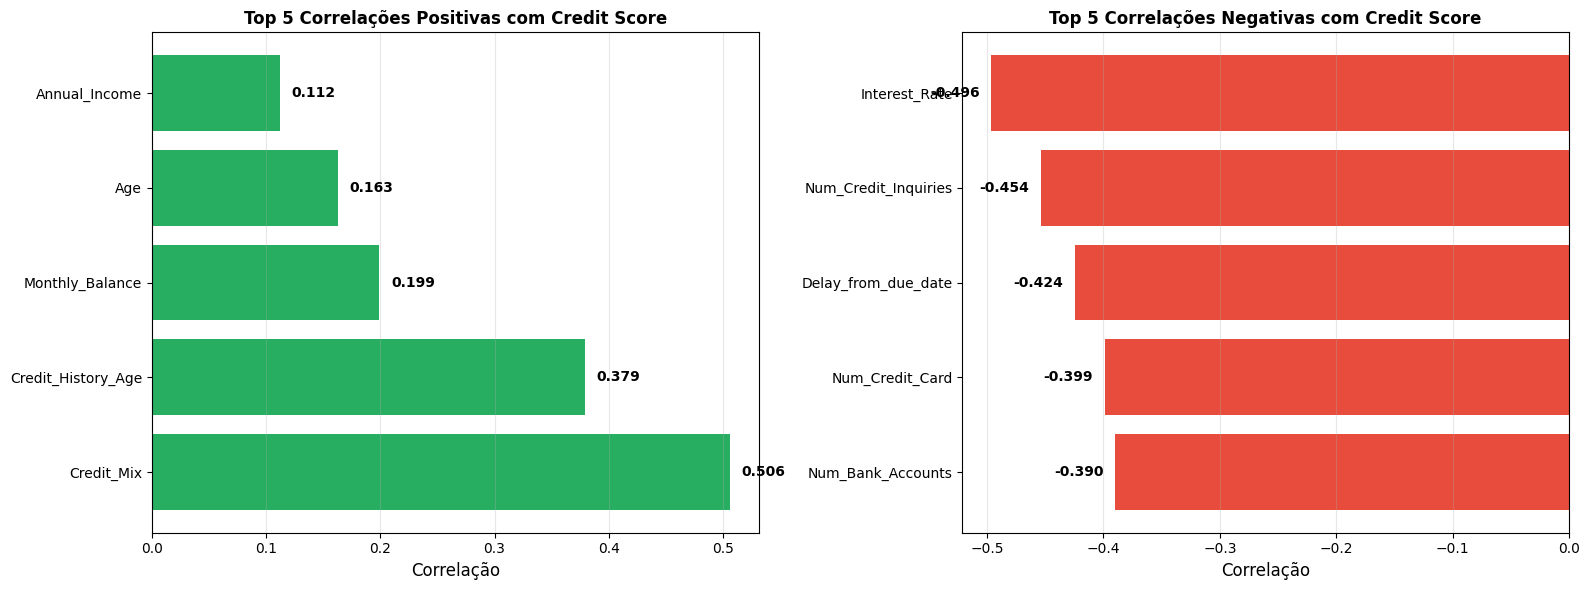

In [19]:
# Correla√ß√£o das vari√°veis com Credit Score
print("=" * 80)
print("CORRELA√á√ÉO DAS VARI√ÅVEIS COM CREDIT SCORE")
print("=" * 80)

correlations = df[var_num + ['Credit_Score']].corr()['Credit_Score'].sort_values(ascending=False)
print("\nTop 10 vari√°veis mais correlacionadas (positivamente):")
display(correlations.head(11).round(3))  # 11 para incluir o pr√≥prio Credit_Score

print("\nTop 10 vari√°veis mais correlacionadas (negativamente):")
display(correlations.tail(10).round(3))

# Visualiza√ß√£o das top correla√ß√µes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correla√ß√µes positivas
top_positive = correlations.head(6)[1:]  # Excluindo o pr√≥prio Credit_Score
axes[0].barh(range(len(top_positive)), top_positive.values, color='#27ae60')
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index)
axes[0].set_xlabel('Correla√ß√£o', fontsize=12)
axes[0].set_title('Top 5 Correla√ß√µes Positivas com Credit Score', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(top_positive.values):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Correla√ß√µes negativas
top_negative = correlations.tail(5)
axes[1].barh(range(len(top_negative)), top_negative.values, color='#e74c3c')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index)
axes[1].set_xlabel('Correla√ß√£o', fontsize=12)
axes[1].set_title('Top 5 Correla√ß√µes Negativas com Credit Score', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(top_negative.values):
    axes[1].text(v - 0.01, i, f'{v:.3f}', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()


AN√ÅLISE DE COMPORTAMENTO FINANCEIRO POR CREDIT SCORE

1. M√âDIA DE PAGAMENTOS ATRASADOS POR CATEGORIA:


mean  median   max
Credit_Score_Label                     
Good                 8.92     9.0  27.0
Poor                16.31    17.0  28.0
Standard            13.96    14.0  28.0


2. UTILIZA√á√ÉO DE CR√âDITO POR CATEGORIA:


mean  median   std
Credit_Score_Label                     
Good                32.21   32.25  5.01
Poor                31.81   31.86  5.00
Standard            32.03   32.01  4.97


3. HIST√ìRICO DE CR√âDITO (em anos) POR CATEGORIA:


mean  median  min   max
Credit_Score_Label                          
Good                23.07   23.10  0.6  33.8
Poor                13.88   13.70  0.1  33.8
Standard            18.28   17.57  0.1  33.8

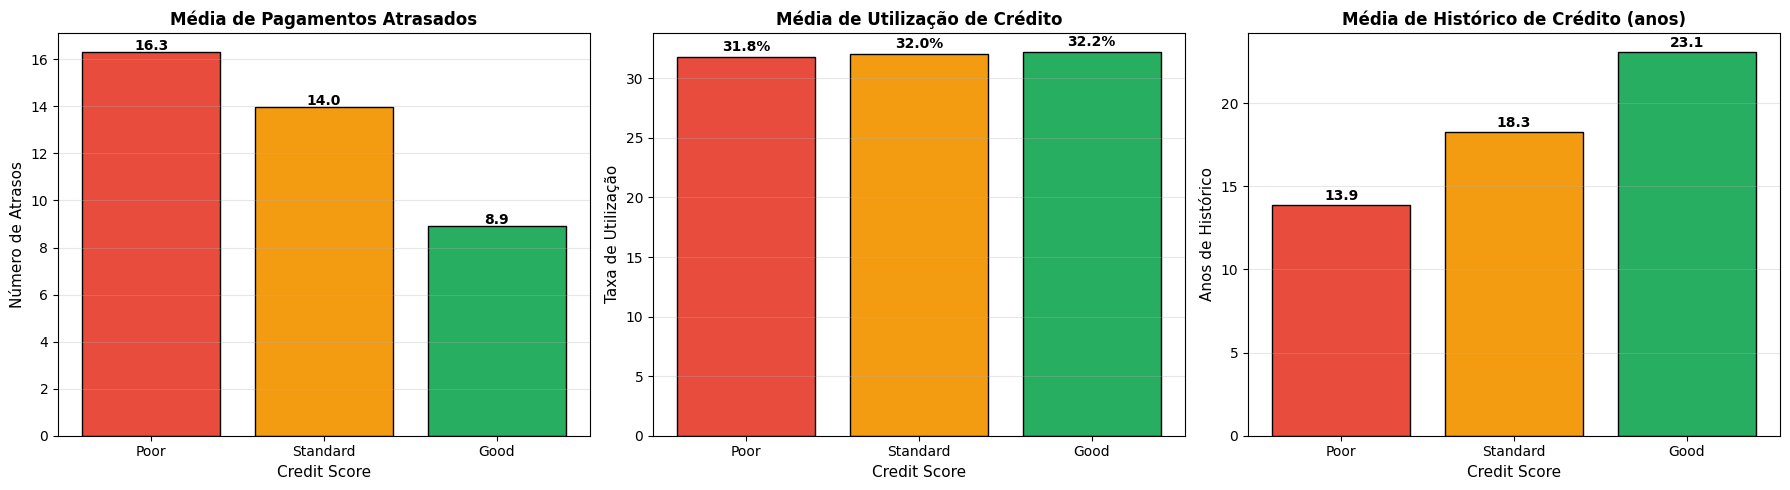

In [20]:
# An√°lise de comportamento de pagamento
print("=" * 80)
print("AN√ÅLISE DE COMPORTAMENTO FINANCEIRO POR CREDIT SCORE")
print("=" * 80)

# An√°lise de atrasos de pagamento
print("\n1. M√âDIA DE PAGAMENTOS ATRASADOS POR CATEGORIA:")
delay_analysis = df.groupby('Credit_Score_Label')['Num_of_Delayed_Payment'].agg(['mean', 'median', 'max']).round(2)
display(delay_analysis)

# An√°lise de utiliza√ß√£o de cr√©dito
print("\n2. UTILIZA√á√ÉO DE CR√âDITO POR CATEGORIA:")
credit_util = df.groupby('Credit_Score_Label')['Credit_Utilization_Ratio'].agg(['mean', 'median', 'std']).round(2)
display(credit_util)

# An√°lise de hist√≥rico de cr√©dito
print("\n3. HIST√ìRICO DE CR√âDITO (em anos) POR CATEGORIA:")
credit_hist = df.groupby('Credit_Score_Label')['Credit_History_Age'].agg(['mean', 'median', 'min', 'max']).round(2)
display(credit_hist)

# Visualiza√ß√£o comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gr√°fico 1: Pagamentos Atrasados
delay_means = df.groupby('Credit_Score_Label')['Num_of_Delayed_Payment'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[0].bar(delay_means.index, delay_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[0].set_title('M√©dia de Pagamentos Atrasados', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Credit Score', fontsize=11)
axes[0].set_ylabel('N√∫mero de Atrasos', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(delay_means.values):
    axes[0].text(i, v + 0.1, f'{v:.1f}', ha='center', fontweight='bold')

# Gr√°fico 2: Utiliza√ß√£o de Cr√©dito
util_means = df.groupby('Credit_Score_Label')['Credit_Utilization_Ratio'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[1].bar(util_means.index, util_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[1].set_title('M√©dia de Utiliza√ß√£o de Cr√©dito', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Credit Score', fontsize=11)
axes[1].set_ylabel('Taxa de Utiliza√ß√£o', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(util_means.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# Gr√°fico 3: Hist√≥rico de Cr√©dito
hist_means = df.groupby('Credit_Score_Label')['Credit_History_Age'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[2].bar(hist_means.index, hist_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[2].set_title('M√©dia de Hist√≥rico de Cr√©dito (anos)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Credit Score', fontsize=11)
axes[2].set_ylabel('Anos de Hist√≥rico', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(hist_means.values):
    axes[2].text(i, v + 0.3, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### üí° Insights de Neg√≥cio e Perfis de Risco

Extra√ß√£o de padr√µes comportamentais e recomenda√ß√µes para a Quantum Finance.


In [21]:
print("=" * 80)
print("INSIGHTS DE NEG√ìCIO - PERFIS DE RISCO")
print("=" * 80)

# Cria√ß√£o de perfis consolidados
profile_summary = pd.DataFrame({
    'M√©trica': [
        'Renda Anual M√©dia (R$)',
        'Sal√°rio Mensal M√©dio (R$)',
        'D√≠vida Pendente M√©dia (R$)',
        'Utiliza√ß√£o Cr√©dito (%)',
        'Pagamentos Atrasados',
        'Consultas de Cr√©dito',
        'Hist√≥rico Cr√©dito (anos)',
        'EMI Total Mensal (R$)'
    ],
    'Poor': [
        df[df['Credit_Score_Label'] == 'Poor']['Annual_Income'].mean(),
        df[df['Credit_Score_Label'] == 'Poor']['Monthly_Inhand_Salary'].mean(),
        df[df['Credit_Score_Label'] == 'Poor']['Outstanding_Debt'].mean(),
        df[df['Credit_Score_Label'] == 'Poor']['Credit_Utilization_Ratio'].mean(),
        df[df['Credit_Score_Label'] == 'Poor']['Num_of_Delayed_Payment'].mean(),
        df[df['Credit_Score_Label'] == 'Poor']['Num_Credit_Inquiries'].mean(),
        df[df['Credit_Score_Label'] == 'Poor']['Credit_History_Age'].mean(),
        df[df['Credit_Score_Label'] == 'Poor']['Total_EMI_per_month'].mean()
    ],
    'Standard': [
        df[df['Credit_Score_Label'] == 'Standard']['Annual_Income'].mean(),
        df[df['Credit_Score_Label'] == 'Standard']['Monthly_Inhand_Salary'].mean(),
        df[df['Credit_Score_Label'] == 'Standard']['Outstanding_Debt'].mean(),
        df[df['Credit_Score_Label'] == 'Standard']['Credit_Utilization_Ratio'].mean(),
        df[df['Credit_Score_Label'] == 'Standard']['Num_of_Delayed_Payment'].mean(),
        df[df['Credit_Score_Label'] == 'Standard']['Num_Credit_Inquiries'].mean(),
        df[df['Credit_Score_Label'] == 'Standard']['Credit_History_Age'].mean(),
        df[df['Credit_Score_Label'] == 'Standard']['Total_EMI_per_month'].mean()
    ],
    'Good': [
        df[df['Credit_Score_Label'] == 'Good']['Annual_Income'].mean(),
        df[df['Credit_Score_Label'] == 'Good']['Monthly_Inhand_Salary'].mean(),
        df[df['Credit_Score_Label'] == 'Good']['Outstanding_Debt'].mean(),
        df[df['Credit_Score_Label'] == 'Good']['Credit_Utilization_Ratio'].mean(),
        df[df['Credit_Score_Label'] == 'Good']['Num_of_Delayed_Payment'].mean(),
        df[df['Credit_Score_Label'] == 'Good']['Num_Credit_Inquiries'].mean(),
        df[df['Credit_Score_Label'] == 'Good']['Credit_History_Age'].mean(),
        df[df['Credit_Score_Label'] == 'Good']['Total_EMI_per_month'].mean()
    ]
})

# Arredondar valores
profile_summary['Poor'] = profile_summary['Poor'].round(2)
profile_summary['Standard'] = profile_summary['Standard'].round(2)
profile_summary['Good'] = profile_summary['Good'].round(2)

print("\nPERFIL FINANCEIRO CONSOLIDADO POR CATEGORIA DE CR√âDITO:")
print("=" * 80)
display(profile_summary)

# Calcular diferen√ßas percentuais entre Poor e Good
print("\n" + "=" * 80)
print("DIFEREN√áAS ENTRE PERFIS 'POOR' vs 'GOOD':")
print("=" * 80)

differences = pd.DataFrame({
    'M√©trica': profile_summary['M√©trica'],
    'Diferen√ßa (%)': ((profile_summary['Good'] - profile_summary['Poor']) / profile_summary['Poor'] * 100).round(2)
})

display(differences)


INSIGHTS DE NEG√ìCIO - PERFIS DE RISCO

PERFIL FINANCEIRO CONSOLIDADO POR CATEGORIA DE CR√âDITO:


M√©trica      Poor  Standard      Good
0      Renda Anual M√©dia (R$)  32404.74  37032.68  40063.25
1   Sal√°rio Mensal M√©dio (R$)   2752.06   3067.15   3294.33
2  D√≠vida Pendente M√©dia (R$)   2161.32   1356.18    813.63
3      Utiliza√ß√£o Cr√©dito (%)     31.81     32.03     32.21
4        Pagamentos Atrasados     16.31     13.96      8.92
5        Consultas de Cr√©dito      8.54      5.57      3.34
6    Hist√≥rico Cr√©dito (anos)     13.88     18.28     23.07
7       EMI Total Mensal (R$)     94.90     78.56     65.48


DIFEREN√áAS ENTRE PERFIS 'POOR' vs 'GOOD':


M√©trica  Diferen√ßa (%)
0      Renda Anual M√©dia (R$)          23.63
1   Sal√°rio Mensal M√©dio (R$)          19.70
2  D√≠vida Pendente M√©dia (R$)         -62.35
3      Utiliza√ß√£o Cr√©dito (%)           1.26
4        Pagamentos Atrasados         -45.31
5        Consultas de Cr√©dito         -60.89
6    Hist√≥rico Cr√©dito (anos)          66.21
7       EMI Total Mensal (R$)         -31.00

### üìã Conclus√µes da An√°lise Explorat√≥ria

#### üéØ Principais Descobertas:

**1. Distribui√ß√£o do Target:**
- A base possui uma distribui√ß√£o relativamente balanceada entre as tr√™s classes de Credit Score
- Isso facilita o treinamento de modelos de classifica√ß√£o sem necessidade de balanceamento artificial

**2. Padr√µes Financeiros Identificados:**

**Clientes "POOR" (Alto Risco):**
- ‚ùå Maior n√∫mero de pagamentos atrasados
- ‚ùå Alta utiliza√ß√£o de cr√©dito (pr√≥xima ao limite)
- ‚ùå Menor hist√≥rico de cr√©dito
- ‚ùå Mais consultas de cr√©dito recentes (indicativo de necessidade de cr√©dito)

**Clientes "GOOD" (Baixo Risco):**
- ‚úÖ Poucos ou nenhum pagamento atrasado
- ‚úÖ Utiliza√ß√£o de cr√©dito moderada e controlada
- ‚úÖ Hist√≥rico de cr√©dito mais longo e estabelecido
- ‚úÖ Comportamento financeiro est√°vel

**3. Vari√°veis Mais Importantes:**
- **Num_of_Delayed_Payment**: Forte correla√ß√£o negativa com bom score
- **Credit_Utilization_Ratio**: Utiliza√ß√£o alta indica maior risco
- **Credit_History_Age**: Hist√≥rico mais longo associado a melhor score
- **Outstanding_Debt**: D√≠vida pendente impacta negativamente
- **Payment_Behaviour**: Padr√£o de pagamento √© crucial

#### üíº Recomenda√ß√µes para a Quantum Finance:

**1. Crit√©rios de Aprova√ß√£o Autom√°tica:**
- Clientes "Good": Aprova√ß√£o imediata com limites maiores
- Clientes "Standard": Aprova√ß√£o padr√£o com monitoramento
- Clientes "Poor": An√°lise manual ou aprova√ß√£o com limite reduzido

**2. Estrat√©gias de Precifica√ß√£o:**
- Ajustar taxas de juros baseado no perfil de risco
- Oferecer condi√ß√µes especiais para clientes "Good" (fideliza√ß√£o)

**3. Monitoramento Cont√≠nuo:**
- Acompanhar mudan√ßas no comportamento de pagamento
- Alertas autom√°ticos para deteriora√ß√£o de score
- Programas de recupera√ß√£o para clientes em risco

**4. Oportunidades de Cross-sell:**
- Clientes "Good": Produtos premium, cart√µes platinum, investimentos
- Clientes "Standard": Produtos de educa√ß√£o financeira e upgrade
- Clientes "Poor": Produtos de reconstru√ß√£o de cr√©dito

---

**Pr√≥ximas Etapas:** Desenvolvimento e compara√ß√£o dos modelos de Machine Learning (Random Forest, XGBoost, LightGBM)


---

### üìä Resumo das An√°lises Implementadas na EDA

Esta se√ß√£o de An√°lise Explorat√≥ria foi expandida com as seguintes an√°lises aprofundadas:

‚úÖ **An√°lise de Valores Ausentes**: Identifica√ß√£o detalhada de missing values por coluna

‚úÖ **Distribui√ß√£o do Target**: Visualiza√ß√£o da propor√ß√£o de classes (Poor/Standard/Good)

‚úÖ **An√°lise Bivariada**: Compara√ß√£o de vari√°veis financeiras por categoria de Credit Score

‚úÖ **Visualiza√ß√µes Profissionais**: Box plots e distribui√ß√µes sobrepostas por classe

‚úÖ **Correla√ß√µes com Target**: Identifica√ß√£o das vari√°veis mais importantes

‚úÖ **Padr√µes Financeiros**: An√°lise de comportamento de pagamento e utiliza√ß√£o de cr√©dito

‚úÖ **Perfis de Risco**: Caracteriza√ß√£o detalhada de cada categoria de cliente

‚úÖ **Insights de Neg√≥cio**: Recomenda√ß√µes pr√°ticas para a Quantum Finance

**Total de vari√°veis analisadas**: 18 features num√©ricas + 1 target (Credit_Score)

---


Exibindo a matriz de correla√ß√£o.

In [22]:
print("\nMatriz de correla√ß√£o:")
corr = df.corr(numeric_only=True)
display(corr)


Matriz de correla√ß√£o:


Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.054531               0.047084   
Annual_Income             0.054531       1.000000               0.919115   
Monthly_Inhand_Salary     0.047084       0.919115               1.000000   
Num_Bank_Accounts        -0.195050      -0.154223              -0.142277   
Num_Credit_Card          -0.148584      -0.131049              -0.120568   
Interest_Rate            -0.217974      -0.179431              -0.166807   
Num_of_Loan              -0.205653      -0.139391              -0.127486   
Delay_from_due_date      -0.174220      -0.139692              -0.129533   
Num_of_Delayed_Payment   -0.185342      -0.148667              -0.138266   
Changed_Credit_Limit     -0.152876      -0.102622              -0.096633   
Num_Credit_Inquiries     -0.246758      -0.167860              -0.155858   
Credit_Mix                0.247915       0.189691               0.175483   
Outstanding_Debt         -0.201438      -0.184500              -0.169862   
Credit_Utilization_Ratio  0.012754       0.098313               0.090652   
Credit_History_Age        0.224700       0.168282               0.156652   
Payment_of_Min_Amount    -0.160495      -0.096717              -0.093021   
Total_EMI_per_month      -0.096559       0.597468               0.545380   
Amount_invested_monthly   0.028618       0.543391               0.504377   
Monthly_Balance           0.116606       0.724140               0.673554   
Credit_Score              0.162520       0.112151               0.102035   

                          Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Age                               -0.195050        -0.148584      -0.217974   
Annual_Income                     -0.154223        -0.131049      -0.179431   
Monthly_Inhand_Salary             -0.142277        -0.120568      -0.166807   
Num_Bank_Accounts                  1.000000         0.437790       0.570780   
Num_Credit_Card                    0.437790         1.000000       0.495437   
Interest_Rate                      0.570780         0.495437       1.000000   
Num_of_Loan                        0.467327         0.408574       0.543938   
Delay_from_due_date                0.551269         0.477597       0.574415   
Num_of_Delayed_Payment             0.581020         0.413371       0.552168   
Changed_Credit_Limit               0.308894         0.240758       0.350194   
Num_Credit_Inquiries               0.519621         0.464495       0.632537   
Credit_Mix                        -0.713351        -0.541666      -0.736809   
Outstanding_Debt                   0.510334         0.485936       0.623781   
Credit_Utilization_Ratio          -0.030852        -0.026389      -0.035221   
Credit_History_Age                -0.458526        -0.398652      -0.548004   
Payment_of_Min_Amount              0.343025         0.244664       0.371455   
Total_EMI_per_month                0.178453         0.160376       0.206730   
Amount_invested_monthly           -0.113374        -0.092343      -0.129674   
Monthly_Balance                   -0.254589        -0.222880      -0.296322   
Credit_Score                      -0.389712        -0.398765      -0.496386   

                          Num_of_Loan  Delay_from_due_date  \
Age                         -0.205653            -0.174220   
Annual_Income               -0.139391            -0.139692   
Monthly_Inhand_Salary       -0.127486            -0.129533   
Num_Bank_Accounts            0.467327             0.551269   
Num_Credit_Card              0.408574             0.477597   
Interest_Rate                0.543938             0.574415   
Num_of_Loan                  1.000000             0.490026   
Delay_from_due_date          0.490026             1.000000   
Num_of_Delayed_Payment       0.468614             0.526931   
Changed_Credit_Limit         0.357690             0.271076   
Num_Credit_Inquiries         0.549338             0.535803   
Credit_Mix                  -0

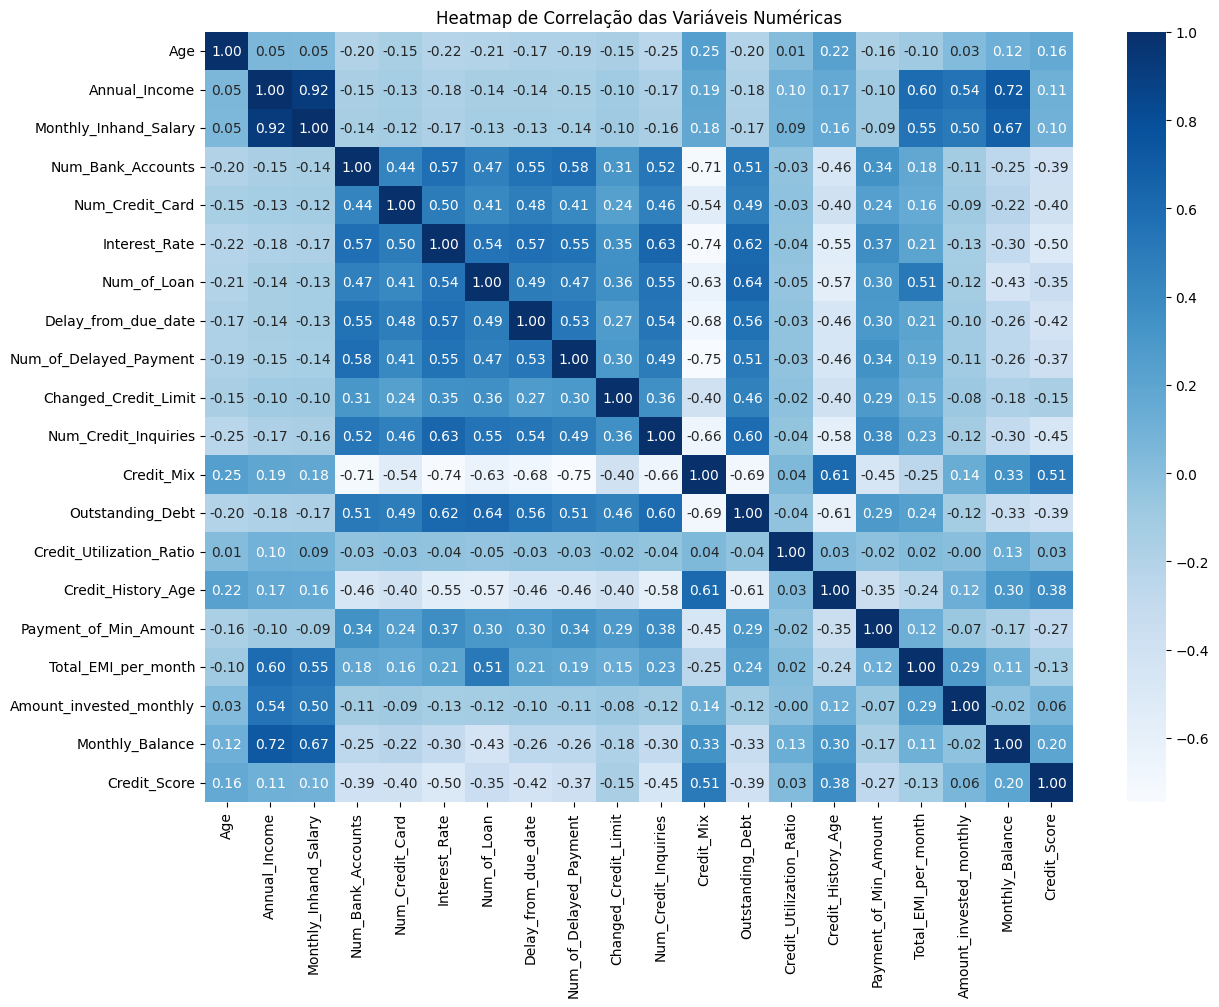

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()


<i><p style='color:#006DB2' ><big><strong>10.</strong></big>Modelos de Classifica√ß√£o </p>
<br>
<p style='color:#006DB2' ><big><strong>Random Forest</strong></big></p>


<p style='color:#006DB2' ><li style='color:#006DB2' >Cria pipeline com StandardScaler e RandomForestClassifier.</li>
<li style='color:#006DB2' >Usa GridSearchCV para otimizar hiperpar√¢metros.</li>
<li style='color:#006DB2' >Exibe melhor score e par√¢metros</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>LightGBM</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina LGBMClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e par√¢metros.</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>XGBoost</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina XGBClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e par√¢metros.</li></p></i>

In [19]:
X = df[var_num].fillna(df[var_num].mean())
y = df['Credit_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None]
}

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Melhor score:", grid.best_score_)
print("Melhores par√¢metros:", grid.best_params_)

Melhor score: 0.7720135363790187
Melhores par√¢metros: {'rf__max_depth': None, 'rf__n_estimators': 200}


In [20]:

X_lgbm = df[var_num].fillna(df[var_num].mean())
y_lgbm = df['Credit_Score']

X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.2, random_state=42)

scaler_lgbm = StandardScaler()
X_train_lgbm_scaled = scaler_lgbm.fit_transform(X_train_lgbm)
X_test_lgbm_scaled = scaler_lgbm.transform(X_test_lgbm)

lgbm_model = LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1]
}

grid_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=3, scoring='accuracy')
grid_lgbm.fit(X_train_lgbm_scaled, y_train_lgbm)

print("Melhor score LightGBM:", grid_lgbm.best_score_)
print("Melhores par√¢metros LightGBM:", grid_lgbm.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,001287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2539
[LightGBM] [Info] Number of data points in the train set: 19700, number of used features: 18
[LightGBM] [Info] Start training from score -1,138483
[LightGBM] [Info] Start training from score -0,634017
[LightGBM] [Info] Start training from score -1,902209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [21]:
X_xgb = df[var_num].fillna(df[var_num].mean())
y_xgb = df['Credit_Score']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_test_xgb_scaled = scaler_xgb.transform(X_test_xgb)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='accuracy')
grid_xgb.fit(X_train_xgb_scaled, y_train_xgb)

print("Melhor score XGBoost:", grid_xgb.best_score_)
print("Melhores par√¢metros XGBoost:", grid_xgb.best_params_)


Melhor score XGBoost: 0.7566835871404399
Melhores par√¢metros XGBoost: {'max_depth': 10, 'n_estimators': 100}
